In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from sklearn import linear_model
from copy import deepcopy
%matplotlib inline


# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df_gc = pd.DataFrame(ground_cricket_data)

In [3]:
regr_gc = linear_model.LinearRegression()
ground_temp = df_gc[['Ground Temperature']]
chirps_sec = df_gc['Chirps/Second']
regr_gc.fit(ground_temp, chirps_sec)

LinearRegression()

### Task 1
1.Find the linear regression equation for this data. 

In [4]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr_gc.coef_[0], regr_gc.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


### Task 2
2.Chart the original data and the equation on the chart.

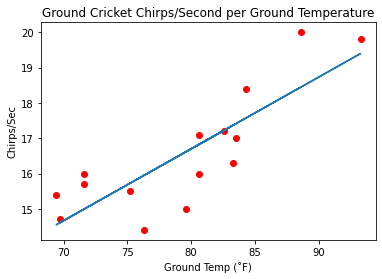

In [5]:
plt.scatter(ground_temp, chirps_sec, color='r')
plt.plot(ground_temp, regr_gc.predict(ground_temp))
plt.title('Ground Cricket Chirps/Second per Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

### Task 3
3.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [6]:
print('R^2 score for this equation : {:.4f} '
      .format(regr_gc.score(ground_temp, chirps_sec)))

R^2 score for this equation : 0.6923 


##### This is not a good fit for the data ,Because the value is lesser than 0.8.It is considered as weaker correlation.

### Task4
4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [7]:
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from copy import deepcopy
%matplotlib inline

print('At 95˚F, our approximation of chirps/sec is: {:.4f}' .format(regr_gc.predict(95)[0]))
      

ValueError: Expected 2D array, got scalar array instead:
array=95.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Task 5
5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [10]:
def chirps_to_temp(y):
    ret = (y - regr_gc.intercept_) / regr_gc.coef_[0]
    print('With an observation of {} chirps/sec, '
          'we expect a ground temp of {:.2f}˚F'.format(y, ret))

In [11]:
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F


#formula expalanation:
y = m * x + b

y - b = m * x

(y - b) / m = x

x = (y - b) / m

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [12]:
df_bb= pd.read_fwf("brain_body.txt")

In [13]:
regr_bb = linear_model.LinearRegression()
body = df_bb[['Body']]
brain = df_bb['Brain']
regr_bb.fit(body, brain)

LinearRegression()

### Brain vs Body Weight: Task 1

In [14]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr_bb.coef_[0], regr_bb.intercept_))

Linear Regression Equation: y = 0.9029 * x + -56.8555


### Brain vs Body Weight: Task 2

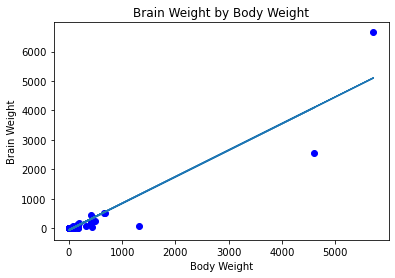

In [15]:
plt.scatter(body, brain, color='b')
plt.plot(body, regr_bb.predict(body))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

### Brain vs Body Weight: Task 3

In [16]:
print('R^2 score for this equation: {:.4f}'
      .format(regr_bb.score(body, brain)))

R^2 score for this equation: 0.8727


##### This is a good fit for the data ,Because the value is greater than 0.8.It is considered as  strong correlation.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [17]:
df_salary = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [18]:
salary_discrim_cols = ["Sex", "Rank", "Year", "Degree", "YSdeg",]

In [19]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df_salary[salary_discrim_cols]
    salary = df_salary['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

#### Salary Discrimination: Task 1

In [20]:
lin_reg_eq_print(salary_discrim_cols, df_salary)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.146547255606


#### Salary Discrimination: Task 2

In [21]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [22]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, df_salary)))

R^2 score for equation using all columns: 0.8547180674410969


In [23]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [24]:
combos = get_combos(salary_discrim_cols)

In [25]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [26]:
combo_scores = all_combo_scores(combos, df_salary)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264598, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907434, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

#### Salary Discrimination, Task 2 result:
The selection with the best 𝑅2 score is: Sex, Rank, Year, Degree, YSdeg: 0.85471806744109691 (as seen above)

However, although including all of the columns produces the highest    𝑅2 score, there are two dominant factors: Year and Rank. Just these two factors taken together have a score of 0.84364809332645985.

#### Salary Discrimination, Task 3

In [27]:
num_by_sex = df_salary.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


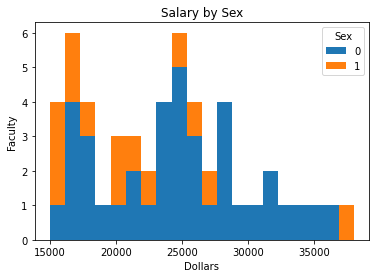

In [41]:
df_salary.pivot_table(index=df_salary.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=1.0, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

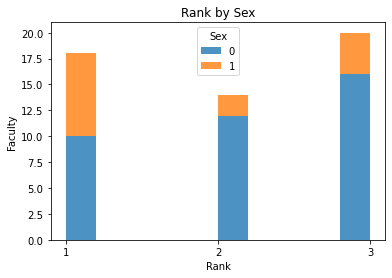

In [37]:
df_salary.pivot_table(index=df_salary.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.8, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

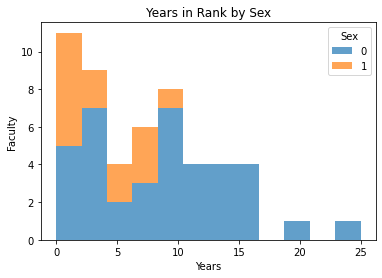

In [39]:
df_salary.pivot_table(index=df_salary.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()


#### Comparing Men and Women

In [42]:
df_salary_10 = df_salary[df_salary['Year'] <= 10 ]

In [44]:
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, df_salary_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660303, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007233, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138203, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080976, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953192, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954576, ('Sex', 'Rank', 'Degree')),
 (0.726317165050737, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482033, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year',

##### From the above data, we see that Sex has no direct influence on Salary: score of 0.0068777005613497311.

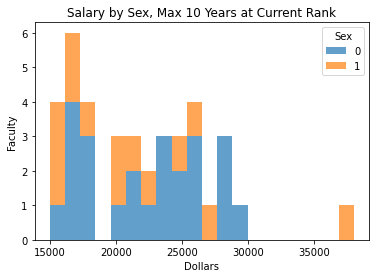

In [45]:
df_salary_10.pivot_table(index=df_salary_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

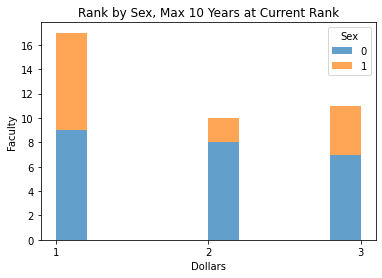

In [46]:
df_salary_10.pivot_table(index=df_salary_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

###### The data show that there is no direct salary discrimination by sex; however, we should investigate the single largest influencer of salary—Rank.

In [47]:
rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_cols)
combo_rank_scores = all_combo_scores(combos_rank, df_salary_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279377, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037699, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759161, ('Sex', 'YSdeg')),
 (0.4848731472423392, ('Year', 'YSdeg')),
 (0.48257642674080214, ('YSdeg',)),
 (0.17754355818252254, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.17613062148611913, ('Year', 'Degree')),
 (0.17502353196257237, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012367, ('Sex',)),
 (0.0036042103162726713, ('Degree',))]

#### Even looking at the influencers of Rank, looking only at those who have been at their present rank for 10 years or less, there is no correlation with Sex. There is no salary discrimination by Sex.